# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [155]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [156]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#url = Ruta + "datasets/iris/iris.csv"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [157]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [158]:
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [159]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [160]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

C:\Users\seval\AppData\Local\Temp\ipykernel_15392\3891942804.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [161]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# Visualize the dataset
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


5. Scatter plot of the data

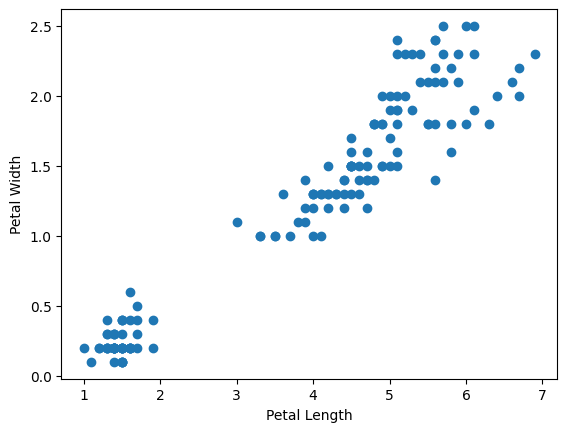

In [162]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


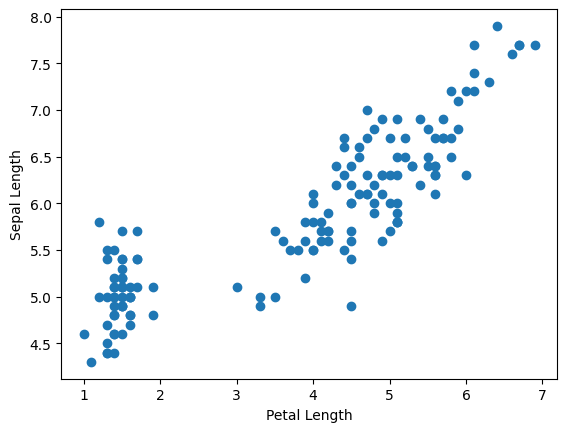

In [163]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


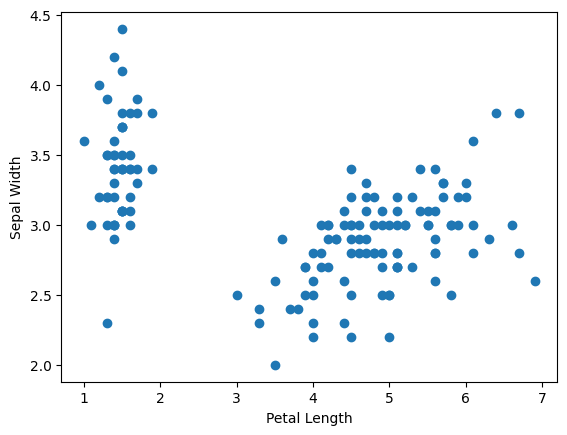

In [164]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


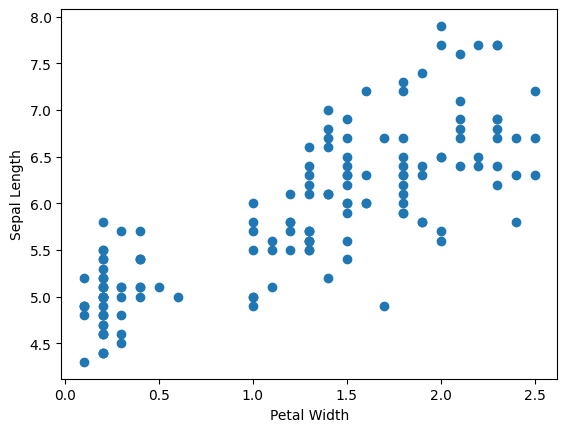

In [165]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


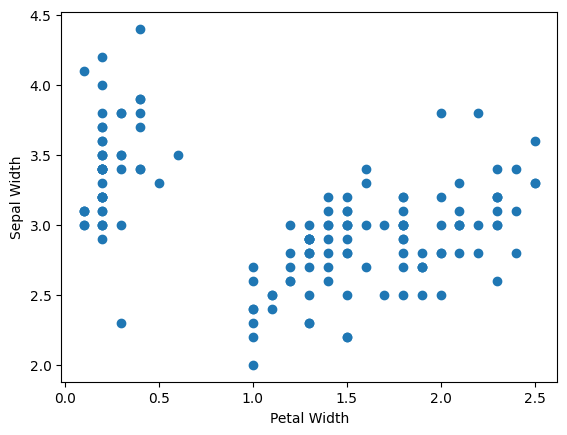

In [166]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


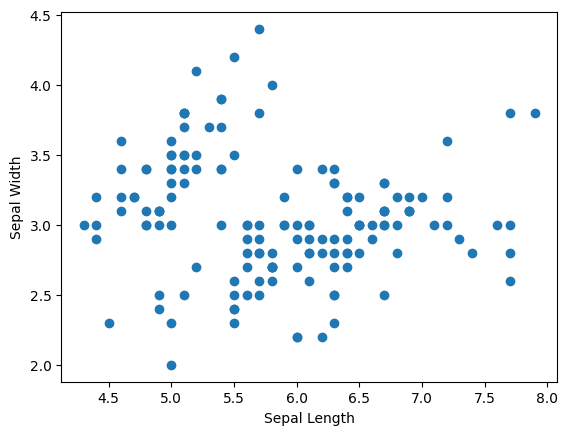

In [167]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


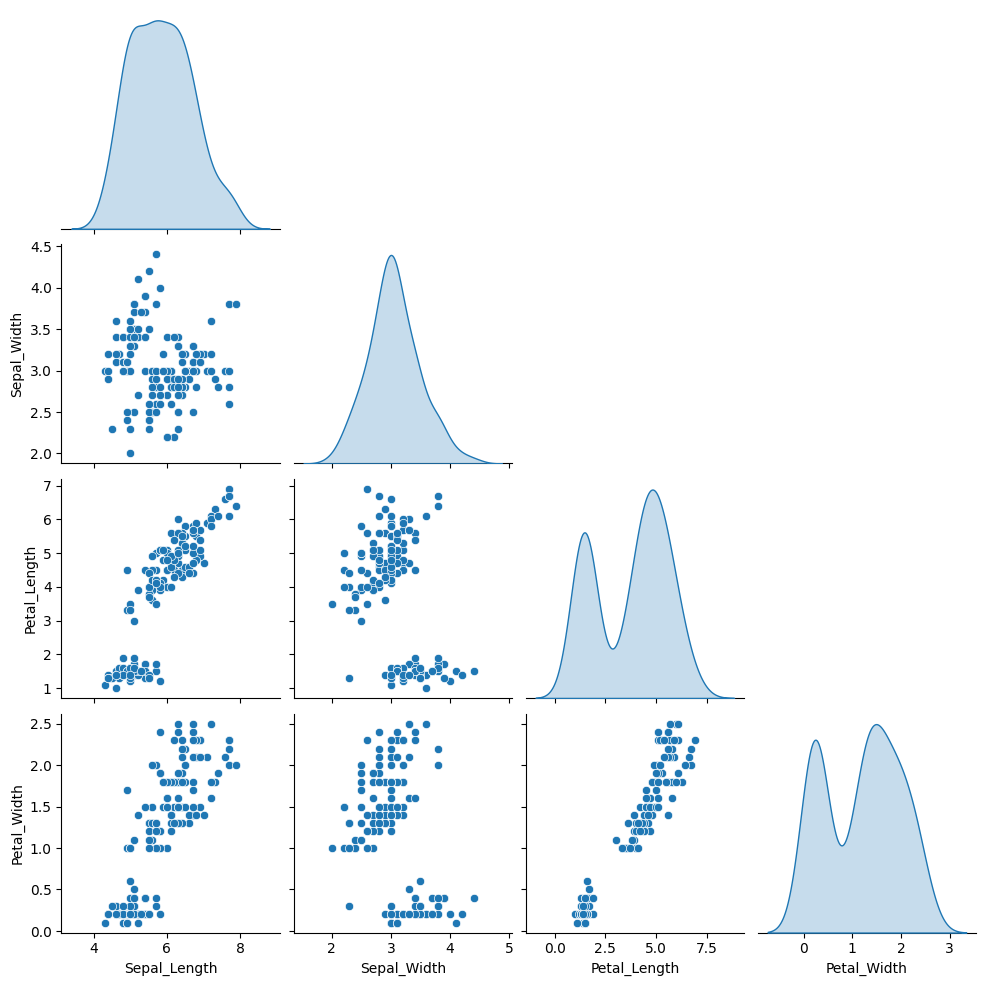

In [168]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


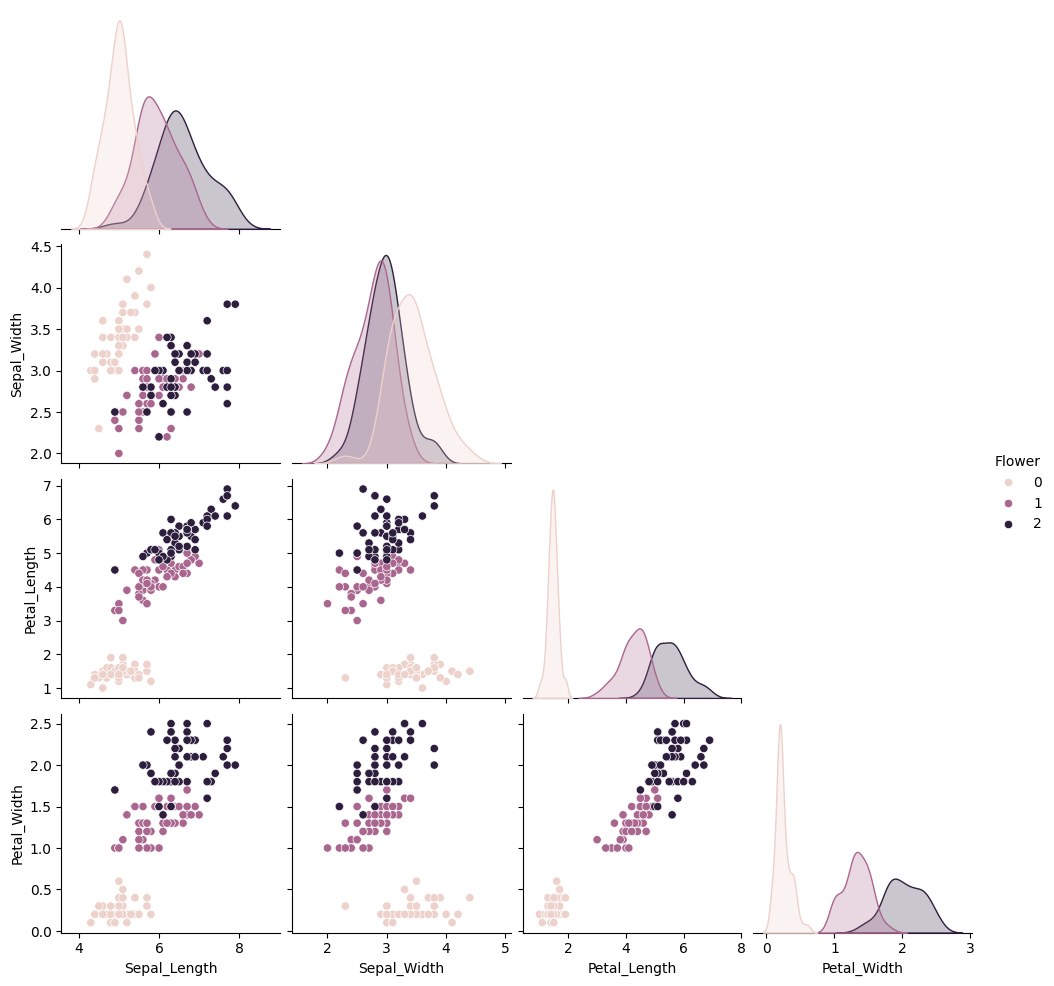

In [169]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [170]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


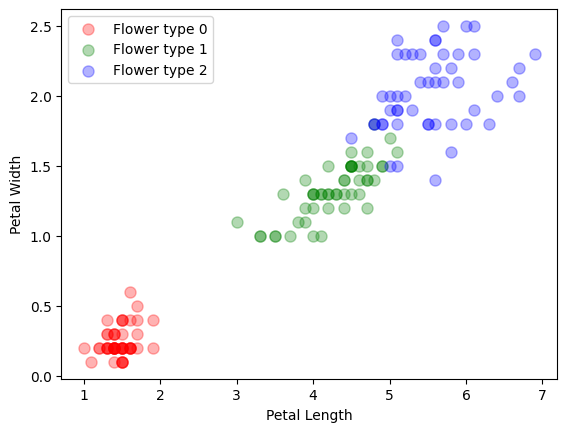

In [171]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


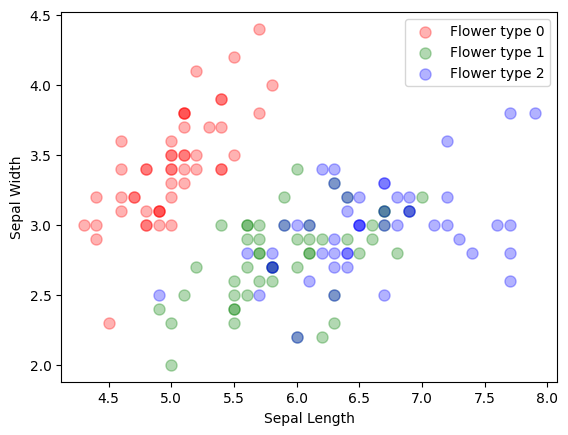

In [172]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [173]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin


X = dataset[['Petal_Length', 'Petal_Width']].values

km = KMeans(n_clusters=3, n_init="auto", random_state=42)

cluster_labels = km.fit_predict(X)
dataset['Cluster'] = cluster_labels

real_cluster_centers = np.array(dataset.groupby('Flower').mean()[['Petal_Length', 'Petal_Width']])

# Get centroids of the estimated clusters from KMeans
esti_cluster_centers = km.cluster_centers_

# Compute the best order to pair the estimated clusters with the real clusters
order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers)

# Reorder the estimated cluster centers based on the computed order
esti_cluster_centers = esti_cluster_centers[order]

# Assign each sample to the nearest true and estimated cluster centers
real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
esti_cluster_labels = pairwise_distances_argmin(X, esti_cluster_centers)

# Print results for verification
print("Real cluster centers (from true labels):\n", real_cluster_centers)
print("\nEstimated cluster centers (ordered):\n", esti_cluster_centers)
print("\nFirst 10 true cluster labels:\n", real_cluster_labels[:10])
print("\nFirst 10 estimated cluster labels:\n", esti_cluster_labels[:10])

Real cluster centers (from true labels):
 [[1.464 0.244]
 [4.26  1.326]
 [5.552 2.026]]

Estimated cluster centers (ordered):
 [[1.464      0.244     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]

First 10 true cluster labels:
 [0 0 0 0 0 0 0 0 0 0]

First 10 estimated cluster labels:
 [0 0 0 0 0 0 0 0 0 0]


In [174]:
# Print real cluster of each observations in the dataset
dataset.Flower.values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [175]:
# Manual pairing of the labels of the estimated clusters with the real ones

km = KMeans(n_clusters=3, n_init="auto", random_state=42)
Cluster1 = km.fit_predict(X)

Cluster1Paired = np.choose(Cluster1, [2, 0, 1]).astype(int) # CHANGE USING THE ORDER THE LABEL ESTIMATED
Cluster1Paired


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [176]:
# Automatic pairing of the labels of the estimated clusters with the real ones: WORK IN PROGRESS

# Define the feature matrix using selected features.
X = dataset[['Petal_Length', 'Petal_Width']].values

# Initialize and fit the KMeans model.
km = KMeans(n_clusters=3, n_init="auto", random_state=42)
km.fit(X)

# Get estimated cluster centers from the fitted model.
esti_cluster_centers = km.cluster_centers_

# Compute centroids of the true clusters using the true labels.
# (Assuming that the means are calculated using the same features.)
real_cluster_centers = np.array(dataset.groupby('Flower').mean()[['Petal_Length', 'Petal_Width']])

# Compute the optimal order for pairing the estimated clusters with the true clusters.
order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers)

# Reorder the estimated cluster centers based on the computed order.
esti_cluster_centers = esti_cluster_centers[order]

# Get the labels for each sample based on the nearest true and estimated cluster centers.
real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
esti_cluster_labels = pairwise_distances_argmin(X, esti_cluster_centers)

# Print results for verification.
print("Real cluster centers:\n", real_cluster_centers)
print("\nEstimated cluster centers (ordered):\n", esti_cluster_centers)
print("\nFirst 10 true cluster labels:\n", real_cluster_labels[:10])
print("\nFirst 10 estimated cluster labels:\n", esti_cluster_labels[:10])


# NOTE: Use info in https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#establishing-parity-between-clusters

Real cluster centers:
 [[1.464 0.244]
 [4.26  1.326]
 [5.552 2.026]]

Estimated cluster centers (ordered):
 [[1.464      0.244     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]

First 10 true cluster labels:
 [0 0 0 0 0 0 0 0 0 0]

First 10 estimated cluster labels:
 [0 0 0 0 0 0 0 0 0 0]


In [177]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = Cluster1Paired

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster,Cluster1
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1
146,6.3,2.5,5.0,1.9,2,2,1
147,6.5,3.0,5.2,2.0,2,2,1
148,6.2,3.4,5.4,2.3,2,2,1


In [178]:
# Print the existing labels/names of the estimated clusters (use the method unique)
dataset.Cluster1.unique()


array([0, 2, 1])

In [179]:
# Print cluster centroides
km.cluster_centers_

# NOTE: centroides also need to be paired


array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

In [180]:
# Print sum of squared error (sse) of the final model
km.inertia_


31.387758974358977

In [181]:
# Print the number of iterations required to converge
km.n_iter_


3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters


## Plot estimated clusters and centrodes

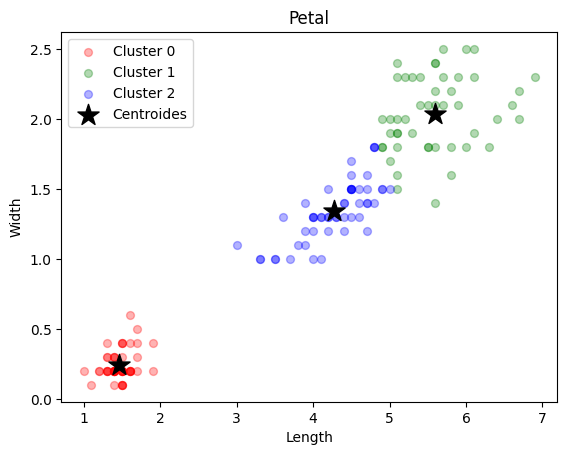

In [182]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

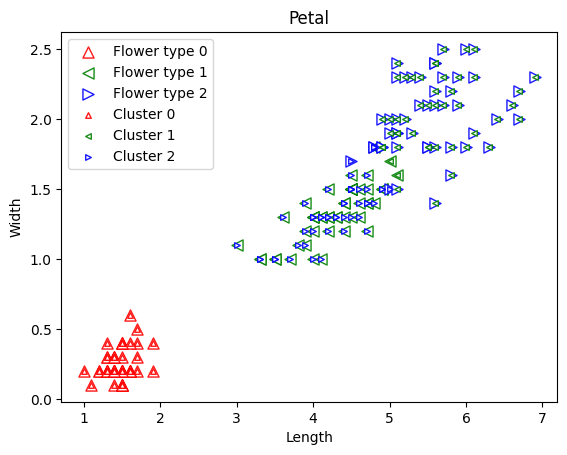

In [183]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()

## Compute performance

How good was the culterization?

NOTE: esto solo que puede hacer si el pairing quedo bien hecho

In [184]:
#Great.

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [185]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


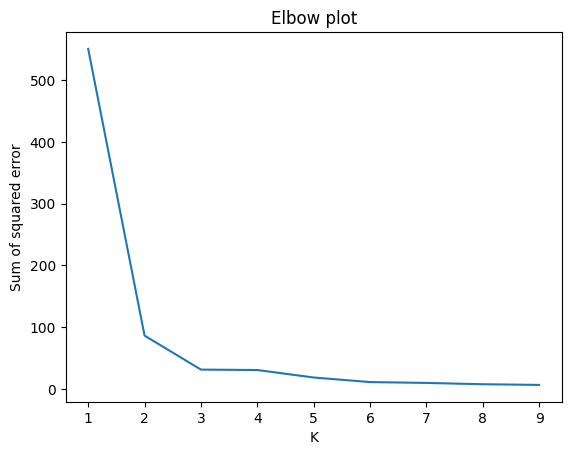

In [186]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


Choose the k after which the sse is minimally reduced


# Selecting K: Silhouette Coefficient

Selecting the number of clusters **k** using the silhouette coefficient

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
}

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

print("Silhouette Coefficients for k=2 to 10:")
print(silhouette_coefficients)


Silhouette Coefficients for k=2 to 10:
[np.float64(0.580184463257396), np.float64(0.4589717867018717), np.float64(0.38528456243462456), np.float64(0.3472646487546106), np.float64(0.34065016778396323), np.float64(0.32883162164047375), np.float64(0.34036518111059166), np.float64(0.3427223781975911), np.float64(0.3403755372424999)]


In [191]:
from sklearn.preprocessing import StandardScaler

df = dataset

silhouette_coefficients = []

k_rng = range(2, 10) 

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

for k in k_rng:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[['Petal_Length', 'Petal_Width']])
    score = silhouette_score(df[['Petal_Length', 'Petal_Width']], kmeans.labels_)
    silhouette_coefficients.append(score)

print("Silhouette Coefficients for k=2 to 9:")
print(silhouette_coefficients)


Silhouette Coefficients for k=2 to 9:
[np.float64(0.7651755502866581), np.float64(0.6602760882193361), np.float64(0.6126440832375689), np.float64(0.5744943344959921), np.float64(0.5658150342518167), np.float64(0.5929510414047748), np.float64(0.4140928212740624), np.float64(0.4360693906757816)]


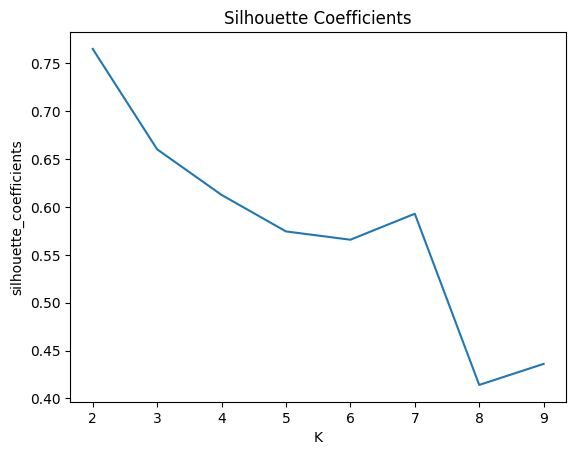

In [192]:

# Plot silhouette coefficient versus k
plt.plot(k_rng,silhouette_coefficients)

plt.title('Silhouette Coefficients')
plt.xlabel('K')
plt.ylabel('silhouette_coefficients')
plt.show()


# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [193]:

# Import library
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()


In [194]:

# Scale data
scaler.fit(df[['Petal_Length']])
df['Petal_Length_Scaled'] = scaler.transform(df[['Petal_Length']])

scaler.fit(df[['Petal_Width']])
df['Petal_Width_Scaled'] = scaler.transform(df[['Petal_Width']])

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled
0,5.1,3.5,1.4,0.2,0,1,0,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,1,0,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,1,0,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,1,0,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,1,0,0.067797,0.041667
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1,0.711864,0.916667
146,6.3,2.5,5.0,1.9,2,2,1,0.677966,0.750000
147,6.5,3.0,5.2,2.0,2,2,1,0.711864,0.791667
148,6.2,3.4,5.4,2.3,2,2,1,0.745763,0.916667


In [195]:
dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,0.973333,1.013333,0.467571,0.457778
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.818795,0.827276,0.299054,0.317984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000,0.101695,0.083333
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,1.000000,0.567797,0.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000,2.000000,0.694915,0.708333
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000,2.000000,1.000000,1.000000


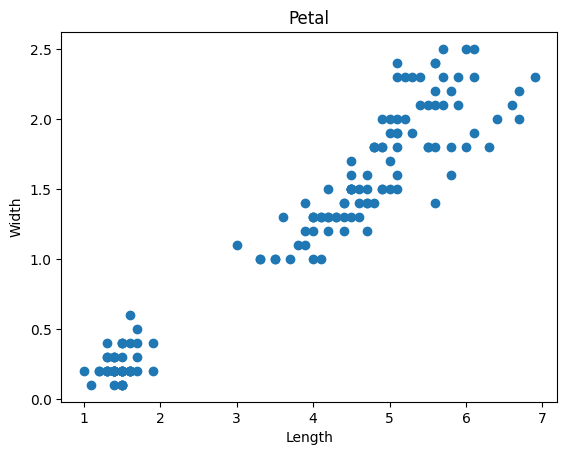

In [196]:

# Scatter plot of the scaled data
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


In [197]:

# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [198]:

# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled,Cluster2
0,5.1,3.5,1.4,0.2,0,1,0,0.067797,0.041667,0
1,4.9,3.0,1.4,0.2,0,1,0,0.067797,0.041667,0
2,4.7,3.2,1.3,0.2,0,1,0,0.050847,0.041667,0
3,4.6,3.1,1.5,0.2,0,1,0,0.084746,0.041667,0
4,5.0,3.6,1.4,0.2,0,1,0,0.067797,0.041667,0
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1,0.711864,0.916667,1
146,6.3,2.5,5.0,1.9,2,2,1,0.677966,0.750000,1
147,6.5,3.0,5.2,2.0,2,2,1,0.711864,0.791667,1
148,6.2,3.4,5.4,2.3,2,2,1,0.745763,0.916667,1


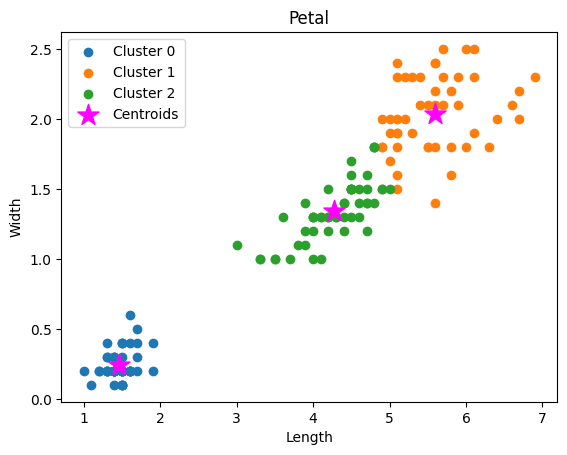

In [201]:
df1 = dataset[dataset.Cluster2 == 0]
df2 = dataset[dataset.Cluster2 == 1]
df3 = dataset[dataset.Cluster2 == 2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            color='magenta', marker='*', label='Centroids', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


WORK IN PROGRESS

In [ ]:
#Remove all observations from one of the classes

# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k